# Tugas Individu: Data-Processing (due to: Kamis 09/03/2023 23.99)

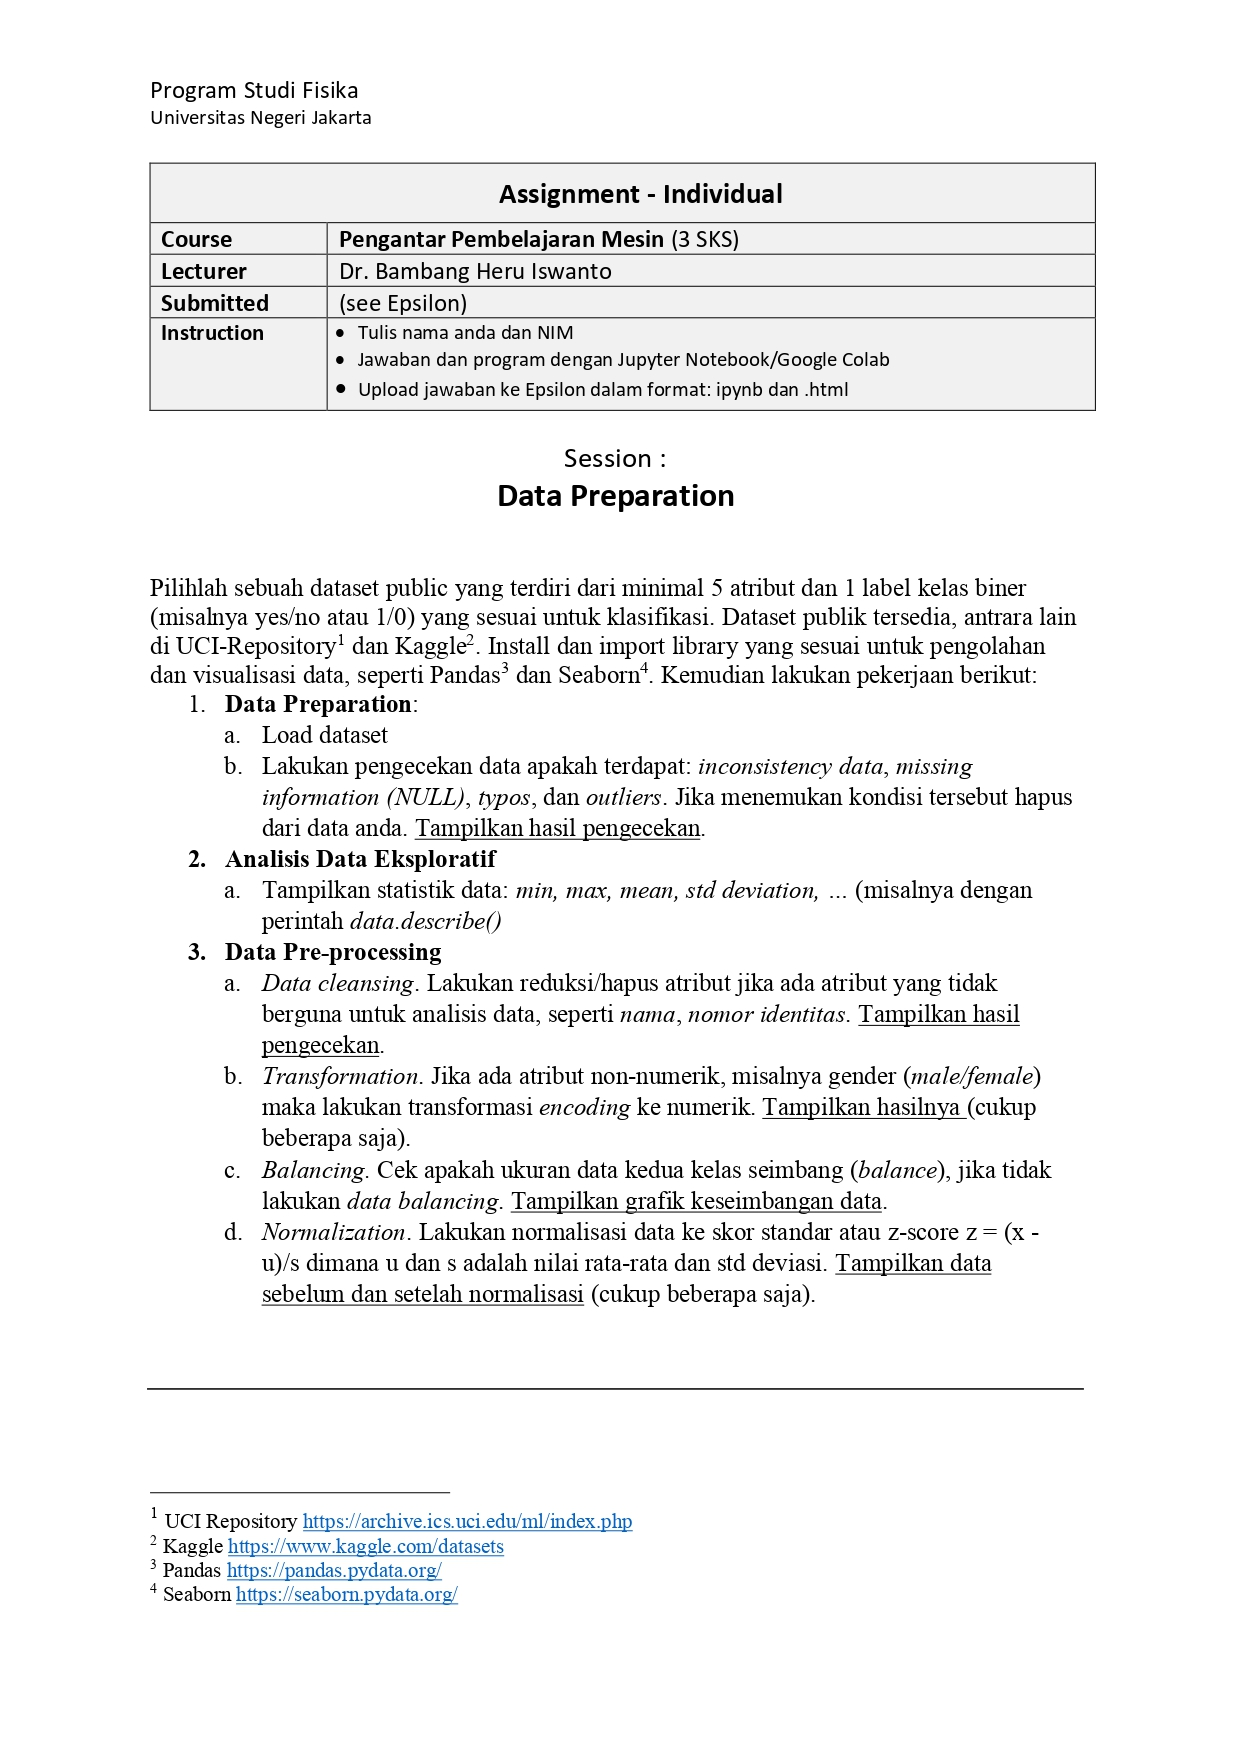

- Nama           : Muhammad Rizky Anugrah
- NIM            : 1306620089
- Kelas          : Fisika - B
- Angkatan       : 2020
- Dosen Pengampu : Dr.rer.nat. Bambang Heru Iswanto

## Metadata

- Data didapatkan dari kaggle dengan link sebagai berikut:
  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
- Judul data nya ialah healthcare-dataset-stroke-data.csv.
- Direname menjadi Data Stroke.csv.
- Menurut Organisasi Kesehatan Dunia (WHO) stroke adalah penyebab kematian ke-2 secara global, bertanggung jawab atas sekitar 11% dari total kematian.
- Dataset ini digunakan untuk memprediksi apakah pasien kemungkinan terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.
- Owner dataset ini adalah fedesoriano (Owner).
- Ukuran data yaitu 5110 baris dan 12 kolom.
- Terdiri dari 11 features dan 1 data label atau target.

Attribute Information
1. id: unique identifier.
2. gender: "Male", "Female" or "Other".
3. age: age of the patient.
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
6. ever_married: "No" or "Yes".
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
8. Residence_type: "Rural" or "Urban".
9. avg_glucose_level: average glucose level in blood.
10. bmi: body mass index.
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*.
12. stroke: 1 if the patient had a stroke or 0 if not.
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## 1. Data Preparation:

### IMPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### a. Load dataset

In [2]:
# Memasukan dataset diabetes ke pandas DataFrame
file = "Data Stroke.csv"
dataset = pd.read_csv(file)

### Menampilkan dan memberikan gambaran dataset yang sudah dimasukan

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
dataset.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
808,21397,Female,40.0,0,0,Yes,Govt_job,Urban,122.74,23.3,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
726,50277,Female,51.0,0,0,Yes,Self-employed,Rural,67.97,29.4,smokes,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
2524,47861,Male,81.0,0,0,Yes,Private,Urban,165.47,28.1,Unknown,0
2299,12849,Female,28.0,0,0,Yes,Private,Urban,87.92,32.5,Unknown,0
720,18430,Female,81.0,0,0,Yes,Self-employed,Urban,90.90,31.2,formerly smoked,0
761,4169,Female,37.0,0,0,No,Private,Rural,92.78,54.2,never smoked,0
3169,10523,Male,56.0,0,0,Yes,Private,Urban,78.93,31.1,Unknown,0
4755,12786,Female,59.0,0,0,Yes,Private,Urban,83.62,34.2,Unknown,0


In [6]:
dataset.shape

(5110, 12)

In [7]:
# Dapatkan daftar jenis semua kolom di dataset
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Mencari tahu apakah dataset berisi nilai nol
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### b. Lakukan pengecekan data apakah terdapat: inconsistency data, missing information (NULL), typos, dan outliers. Jika menemukan kondisi tersebut hapus dari data anda. Tampilkan hasil pengecekan.

#### Inconsistency Data

In [9]:
unique_vals_id = dataset['id'].unique()
unique_vals_gender = dataset['gender'].unique()
unique_vals_age = dataset['age'].unique()
unique_vals_hypertension = dataset['hypertension'].unique()
unique_vals_heart_disease = dataset['heart_disease'].unique()
unique_vals_ever_married = dataset['ever_married'].unique()
unique_vals_work_type = dataset['work_type'].unique()
unique_vals_Residence_type = dataset['Residence_type'].unique()
unique_vals_avg_glucose_level = dataset['avg_glucose_level'].unique()
unique_vals_bmi = dataset['bmi'].unique()
unique_vals_smoking_status = dataset['smoking_status'].unique()
unique_vals_stroke = dataset['stroke'].unique()

print("Inconsistency Data Id =",unique_vals_id)
print("Inconsistency Data Gender =",unique_vals_gender)
print("Inconsistency Data Age =\n",unique_vals_age)
print("Inconsistency Data Hypertension =",unique_vals_hypertension)
print("Inconsistency Data Heart Disease =",unique_vals_heart_disease)
print("Inconsistency Data Ever Married =",unique_vals_ever_married)
print("Inconsistency Data Work Type =",unique_vals_work_type)
print("Inconsistency Data Residence Type =",unique_vals_Residence_type)
print("Inconsistency Data Avg Glucose Level =",unique_vals_avg_glucose_level)
print("Inconsistency Data BMI =\n",unique_vals_bmi)
print("Inconsistency Data Smoking Status =",unique_vals_smoking_status)
print("Inconsistency Data Stroke =",unique_vals_stroke)

Inconsistency Data Id = [ 9046 51676 31112 ... 19723 37544 44679]
Inconsistency Data Gender = ['Male' 'Female' 'Other']
Inconsistency Data Age =
 [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e

In [10]:
print("Data yang tidak diperlukan =\n")
print("Inconsistency Data Id =",unique_vals_id)
print("Inconsistency Data Work Type =",unique_vals_work_type)

print("\nData yang tidak konsisten =\n")
print("Inconsistency Data Gender =",unique_vals_gender)
print("Inconsistency Data Smoking Status =",unique_vals_smoking_status)

Data yang tidak diperlukan =

Inconsistency Data Id = [ 9046 51676 31112 ... 19723 37544 44679]
Inconsistency Data Work Type = ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Data yang tidak konsisten =

Inconsistency Data Gender = ['Male' 'Female' 'Other']
Inconsistency Data Smoking Status = ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### Missing Information (NULL)

In [11]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Data BMI memiliki nilai NaN atau kosong sebanyakan 201. Pasien tidak mengisi data BMI sehingga kosong.

In [12]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
print('No. of zero values in Id = ',dataset[dataset['id']==0].shape[0])
print('No. of zero values in Gender = ',dataset[dataset['gender']==0].shape[0])
print('No. of zero values in Age = ',dataset[dataset['age']==0].shape[0])
print('No. of zero values in Hypertension = ',dataset[dataset['hypertension']==0].shape[0])
print('No. of zero values in Heart Disease = ',dataset[dataset['heart_disease']==0].shape[0])
print('No. of zero values in Ever Married = ',dataset[dataset['ever_married']==0].shape[0])
print('No. of zero values in Work Type = ',dataset[dataset['work_type']==0].shape[0])
print('No. of zero values in Residence Type = ',dataset[dataset['Residence_type']==0].shape[0])
print('No. of zero values in Avg Glucose Level = ',dataset[dataset['avg_glucose_level']==0].shape[0])
print('No. of zero values in BMI = ',dataset[dataset['bmi']==0].shape[0])
print('No. of zero values in Smoking Status = ',dataset[dataset['smoking_status']==0].shape[0])

No. of zero values in Id =  0
No. of zero values in Gender =  0
No. of zero values in Age =  0
No. of zero values in Hypertension =  4612
No. of zero values in Heart Disease =  4834
No. of zero values in Ever Married =  0
No. of zero values in Work Type =  0
No. of zero values in Residence Type =  0
No. of zero values in Avg Glucose Level =  0
No. of zero values in BMI =  0
No. of zero values in Smoking Status =  0


Data yang bernilai 0 pada kolom 'hypertension' dan 'heart_disease' tidak berpengaruh pada pengolahan data. Dikarenakan angka 0 menunjukan bahwa pasien tidak menderita 'hypertension' dan heart_disease'.

#### Typos

In [14]:
print(dataset.select_dtypes(include='object').dtypes)

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object


In [15]:
gender = dataset['gender'].value_counts()
ever_married = dataset['ever_married'].value_counts()
work_type = dataset['work_type'].value_counts()
Residence_type = dataset['Residence_type'].value_counts()
smoking_status = dataset['smoking_status'].value_counts()

print("Typos Object Gender =\n",gender)
print("Typos Object Ever Married =\n",ever_married)
print("Typos Object Work Type =\n",work_type)
print("Typos Object Residence Type =\n",Residence_type)
print("Typos Object Smoking Status =\n",smoking_status)

Typos Object Gender =
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Typos Object Ever Married =
 Yes    3353
No     1757
Name: ever_married, dtype: int64
Typos Object Work Type =
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Typos Object Residence Type =
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Typos Object Smoking Status =
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [16]:
typos_gender = dataset['gender'].str.contains('Male|Female', regex=True)
typos_ever_married = dataset['ever_married'].str.contains('Yes|No', regex=True)
typos_work_type = dataset['work_type'].str.contains('Private|Self-employed|children|Govt_job|Never_worked', regex=True)
typos_Residence_type = dataset['Residence_type'].str.contains('Urban|Rural', regex=True)
typos_smoking_status = dataset['smoking_status'].str.contains('smokes|never smoked|formerly smoked', regex=True)

print(typos_gender.value_counts())
print(typos_ever_married.value_counts())
print(typos_work_type.value_counts())
print(typos_Residence_type.value_counts())
print(typos_smoking_status.value_counts())

True     5109
False       1
Name: gender, dtype: int64
True    5110
Name: ever_married, dtype: int64
True    5110
Name: work_type, dtype: int64
True    5110
Name: Residence_type, dtype: int64
True     3566
False    1544
Name: smoking_status, dtype: int64


In [17]:
false_count_gender = len(dataset) - typos_gender.sum()
false_count_ever_married = len(dataset) - typos_ever_married.sum()
false_count_work_type = len(dataset) - typos_work_type.sum()
false_count_Residence_type = len(dataset) - typos_Residence_type.sum()
false_count_smoking_status = len(dataset) - typos_smoking_status.sum()

print("Total Typo Data Gender =",false_count_gender)
print("Total Typo Data Ever Married =",false_count_ever_married)
print("Total Typo Data Work Type =",false_count_work_type)
print("Total Typo Data Residence Type =",false_count_Residence_type)
print("Total Typo Data Smoking Status =",false_count_smoking_status)

Total Typo Data Gender = 1
Total Typo Data Ever Married = 0
Total Typo Data Work Type = 0
Total Typo Data Residence Type = 0
Total Typo Data Smoking Status = 1544


#### Outliers

In [18]:
print(dataset.select_dtypes(include='int64').dtypes)
print(dataset.select_dtypes(include='float64').dtypes)

id               int64
hypertension     int64
heart_disease    int64
stroke           int64
dtype: object
age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object


In [19]:
print("Outliers Data Hypertension =\n")
print('Max:', dataset['hypertension'].max())
print('Min:', dataset['hypertension'].min())

print("\nOutliers Data Heart Disease =\n")
print('Max:', dataset['heart_disease'].max())
print('Min:', dataset['heart_disease'].min())

print("\nOutliers Data Stroke =\n")
print('Max:', dataset['stroke'].max())
print('Min:', dataset['stroke'].min())

print("\nOutliers Data Age =\n")
print('Max:', dataset['age'].max())
print('Min:', dataset['age'].min())

print("\nOutliers Data Avg Glucose Level =\n")
print('Max:', dataset['avg_glucose_level'].max())
print('Min:', dataset['avg_glucose_level'].min())

print("\nOutliers Data BMI =\n")
print('Max:', dataset['bmi'].max())
print('Min:', dataset['bmi'].min())

Outliers Data Hypertension =

Max: 1
Min: 0

Outliers Data Heart Disease =

Max: 1
Min: 0

Outliers Data Stroke =

Max: 1
Min: 0

Outliers Data Age =

Max: 82.0
Min: 0.08

Outliers Data Avg Glucose Level =

Max: 271.74
Min: 55.12

Outliers Data BMI =

Max: 97.6
Min: 10.3


Tidak terdapat outliers yang significan.

## 2. Analisis Data Eksploratif

### a. Tampilkan statistik data: min, max, mean, std deviation, … (misalnya dengan perintah data.describe()

In [20]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Negative (0):  4861
Positive (1):  249


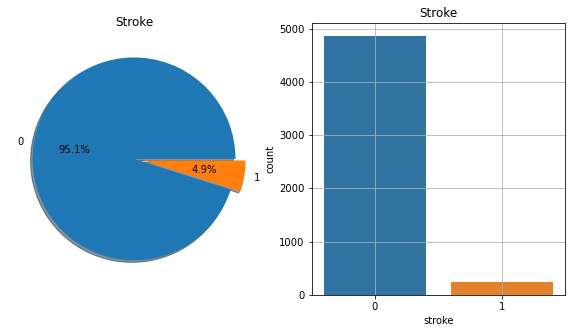

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(10, 5))

dataset['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Stroke')
ax[0].set_ylabel('')

sns.countplot(x='stroke', data=dataset, ax=ax[1])
ax[1].set_title('Stroke')
N, P = dataset['stroke'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

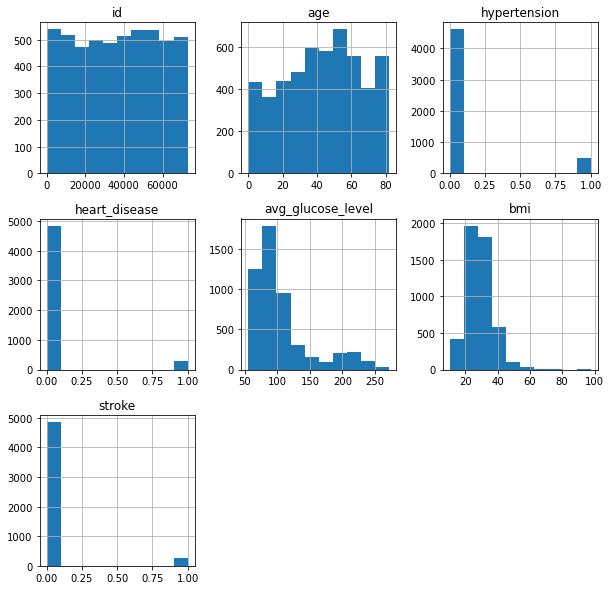

In [22]:
dataset.hist(bins=10,figsize=(10,10))
plt.show()

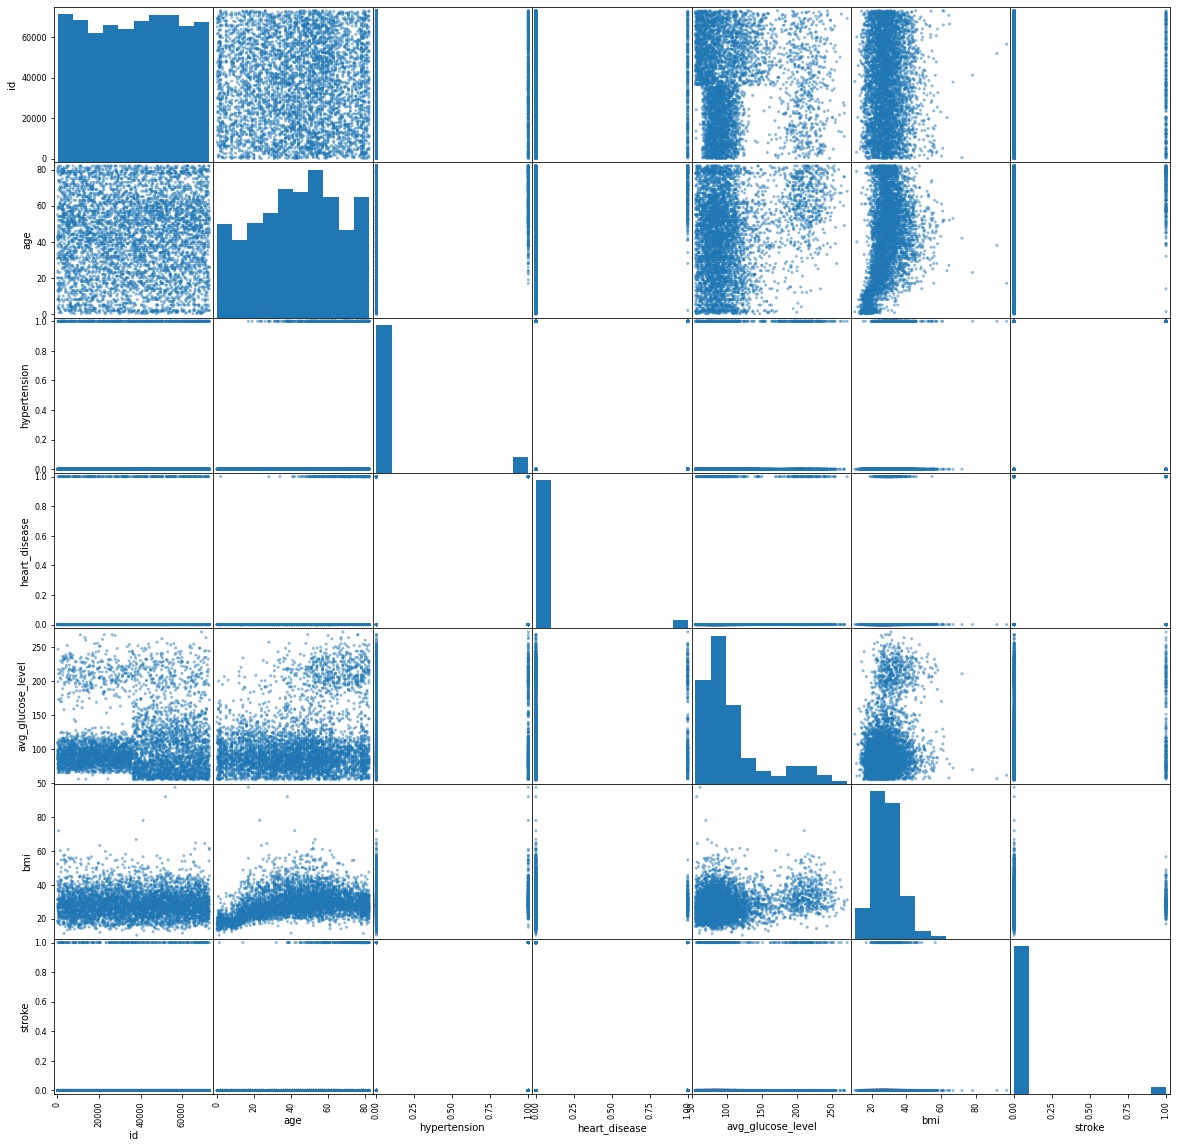

In [23]:
#Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

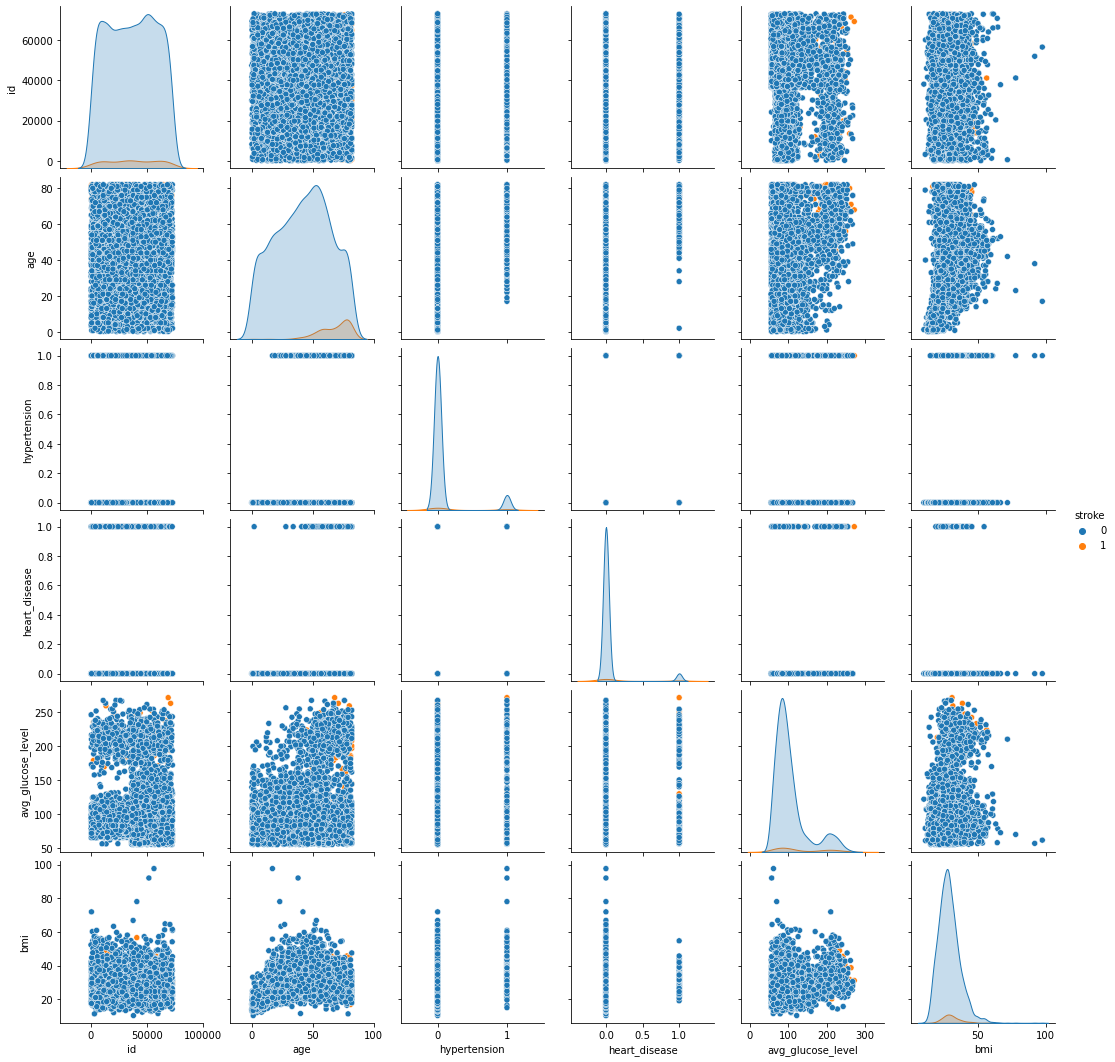

In [24]:
# Pairplot
sns.pairplot(data = dataset, hue = 'stroke')
plt.show()

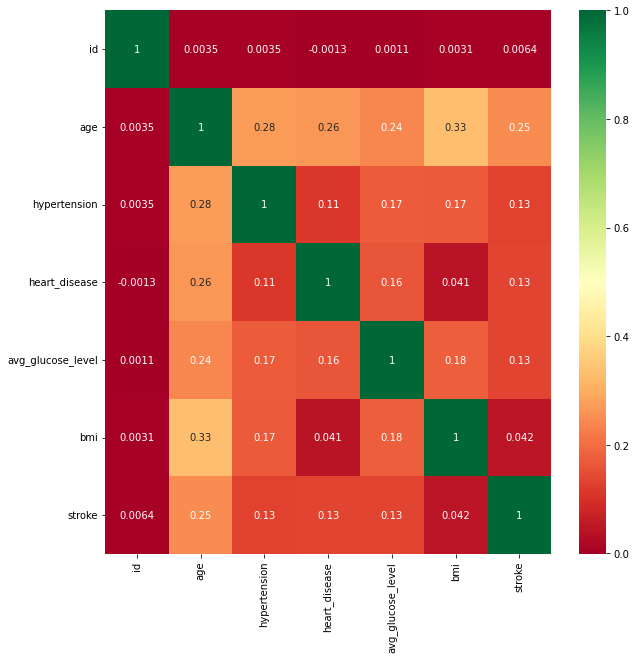

In [25]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## 3. Data Pre-processing

### a. Data cleansing. Lakukan reduksi/hapus atribut jika ada atribut yang tidak berguna untuk analisis data, seperti nama, nomor identitas. Tampilkan hasil pengecekan.

### Gambaran Data Sebelum Dirubah

In [26]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Menghapus kolom 'id' dan 'work_type'

In [27]:
dataset = dataset.drop(['id', 'work_type'], axis=1)

In [28]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [29]:
dataset.shape

(5110, 10)

### Menghapus typo atau inconsistency pada kolom gender

In [30]:
dataset = dataset[dataset['gender'] != 'Other']

In [31]:
dataset.shape

(5109, 10)

### Menghapus typo atau inconsistency pada kolom smoking_status

In [32]:
dataset = dataset[dataset['smoking_status'] != 'Unknown']

In [33]:
dataset.shape

(3565, 10)

### Menghapus data yang memiliki nilai NaN atau kosong pada kolom BMI

In [34]:
dataset = dataset.dropna()
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
dataset.shape

(3425, 10)

### Mengecek kembali data-data yang inconsisten

In [36]:
unique_vals_gender = dataset['gender'].unique()
unique_vals_age = dataset['age'].unique()
unique_vals_hypertension = dataset['hypertension'].unique()
unique_vals_heart_disease = dataset['heart_disease'].unique()
unique_vals_ever_married = dataset['ever_married'].unique()
unique_vals_Residence_type = dataset['Residence_type'].unique()
unique_vals_avg_glucose_level = dataset['avg_glucose_level'].unique()
unique_vals_bmi = dataset['bmi'].unique()
unique_vals_smoking_status = dataset['smoking_status'].unique()
unique_vals_stroke = dataset['stroke'].unique()

print("Inconsistency Data Gender =",unique_vals_gender)
print("Inconsistency Data Age =\n",unique_vals_age)
print("Inconsistency Data Hypertension =",unique_vals_hypertension)
print("Inconsistency Data Heart Disease =",unique_vals_heart_disease)
print("Inconsistency Data Ever Married =",unique_vals_ever_married)
print("Inconsistency Data Residence Type =",unique_vals_Residence_type)
print("Inconsistency Data Avg Glucose Level =",unique_vals_avg_glucose_level)
print("Inconsistency Data BMI =\n",unique_vals_bmi)
print("Inconsistency Data Smoking Status =",unique_vals_smoking_status)
print("Inconsistency Data Stroke =",unique_vals_stroke)

Inconsistency Data Gender = ['Male' 'Female']
Inconsistency Data Age =
 [67. 80. 49. 79. 81. 74. 69. 61. 54. 50. 64. 75. 60. 71. 52. 65. 57. 82.
 48. 72. 78. 76. 58. 39. 77. 63. 73. 56. 45. 70. 59. 66. 68. 47. 53. 38.
 55. 46. 32. 51. 37. 40. 35. 20. 42. 44. 25. 23. 27. 43. 30. 29. 21. 18.
 33. 24. 36. 41. 34. 26. 17. 31. 13. 22. 12. 62. 14. 28. 16. 15. 19. 11.
 10.]
Inconsistency Data Hypertension = [0 1]
Inconsistency Data Heart Disease = [1 0]
Inconsistency Data Ever Married = ['Yes' 'No']
Inconsistency Data Residence Type = ['Urban' 'Rural']
Inconsistency Data Avg Glucose Level = [228.69 105.92 171.23 ... 125.2   82.99 166.29]
Inconsistency Data BMI =
 [36.6 32.5 34.4 24.  29.  27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8
 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9
 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3
 30.2 47.5 30.  28.9 28.1 31.1 21.7 27.  24.1 22.9 29.1 32.3 41.1 29.8
 26.3 29.4 24.4 28.  34.6 30.3 24.2 41.5 22.6 56.6 

Masih terdapat data yang inconsisten dan data yang perlu diencoding menjadi angka.

### b. Transformation. Jika ada atribut non-numerik, misalnya gender (male/female) maka lakukan transformasi encoding ke numerik. Tampilkan hasilnya (cukup beberapa saja).

### Menampilkan data yang masih inconsisten dan perlu diencoding.

In [37]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1


### Encoding kolom gender yaitu 'Female' = 0 dan 'Male' = 1

In [38]:
dataset['gender'] = dataset['gender'].replace(['Female', 'Male'], [0, 1])

In [39]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1


### Encoding kolom ever_married yaitu 'No' = 0 dan 'Yes' = 1

In [40]:
dataset['ever_married'] = dataset['ever_married'].replace(['No', 'Yes'], [0, 1])

In [41]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Urban,186.21,29.0,formerly smoked,1


### Encoding kolom Residence_type yaitu 'Rural' = 0 dan 'Urban' = 1

In [42]:
dataset['Residence_type'] = dataset['Residence_type'].replace(['Rural', 'Urban'], [0, 1])

In [43]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,1,186.21,29.0,formerly smoked,1


### Menggunakan teknik One-Hot Encoding untuk mengonversi nilai-nilai pada kolom "smoking_status" menjadi beberapa kolom biner, di mana setiap kolom mewakili nilai dari setiap variabel pada kolom tersebut. Misalnya, kita dapat menggunakan library pandas pada Python dengan fungsi get_dummies().

In [44]:
dataset = pd.get_dummies(dataset, columns=['smoking_status'])

In [45]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0


Dengan cara ini, kita akan mendapatkan tiga kolom biner, yaitu "smoking_status_formerly smoked", "smoking_status_never smoked", dan "smoking_status_smokes". Setiap nilai pada kolom tersebut akan berisi nilai 0 atau 1, yang menunjukkan apakah subjek pernah merokok sesuai dengan variabel pada kolom "smoking_status" atau tidak.

### c. Balancing. Cek apakah ukuran data kedua kelas seimbang (balance), jika tidak lakukan data balancing. Tampilkan grafik keseimbangan data.

### Melakukan balancing data pada kolom gender

In [46]:
dataset.shape

(3425, 12)

In [47]:
# Menghitung total nilai 1 dan 0 pada kolom gender
total_gender = dataset['gender'].value_counts()

# Mencetak total nilai 1 dan 0 pada kolom gender
print("Jumlah Laki-Laki :", total_gender[1])
print("Jumlah Perempuan :", total_gender[0])

Jumlah Laki-Laki : 1339
Jumlah Perempuan : 2086


In [48]:
num_female = len(dataset[dataset['gender'] == 0])
num_male = len(dataset[dataset['gender'] == 1])

if num_female > num_male:
    drop_indices = np.random.choice(dataset[(dataset['gender'] == 0) & (dataset['stroke'] == 0)].index, 
                                     size=num_female - num_male, replace=False)
    dataset = dataset.drop(drop_indices)

In [49]:
# Menghitung total nilai 1 dan 0 pada kolom gender
total_gender = dataset['gender'].value_counts()

# Mencetak total nilai 1 dan 0 pada kolom gender
print("Jumlah Laki-Laki :", total_gender[1])
print("Jumlah Perempuan :", total_gender[0])

Jumlah Laki-Laki : 1339
Jumlah Perempuan : 1339


In [50]:
dataset.shape

(2678, 12)

### Memvisualisasikan data setelah melewati proses yang sudah dilakukan

In [51]:
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000
mean,0.500000,49.224795,0.125093,0.066841,0.758028,0.503734,108.968521,30.336072,0.067214,0.254668,0.531367,0.213966
std,0.500093,18.967883,0.330887,0.249793,0.428357,0.500079,48.378561,7.193451,0.250440,0.435756,0.499108,0.410179
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,77.492500,25.400000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,50.000000,0.000000,0.000000,1.000000,1.000000,92.540000,29.300000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,64.000000,0.000000,0.000000,1.000000,1.000000,116.910000,34.100000,0.000000,1.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000,1.000000,1.000000,1.000000,1.000000


Negative (0):  2498
Positive (1):  180


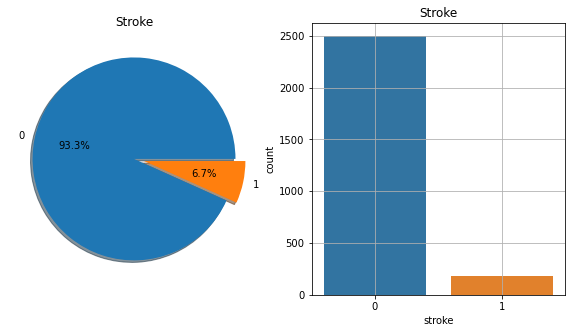

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(10, 5))

dataset['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Stroke')
ax[0].set_ylabel('')

sns.countplot(x='stroke', data=dataset, ax=ax[1])
ax[1].set_title('Stroke')
N, P = dataset['stroke'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

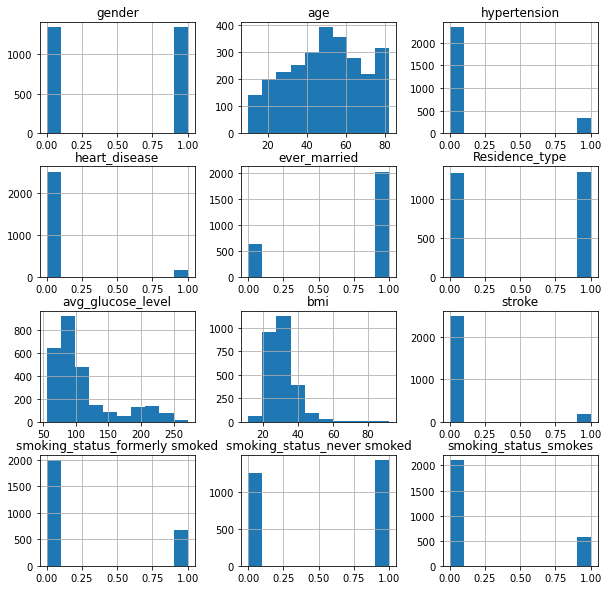

In [53]:
dataset.hist(bins=10,figsize=(10,10))
plt.show()

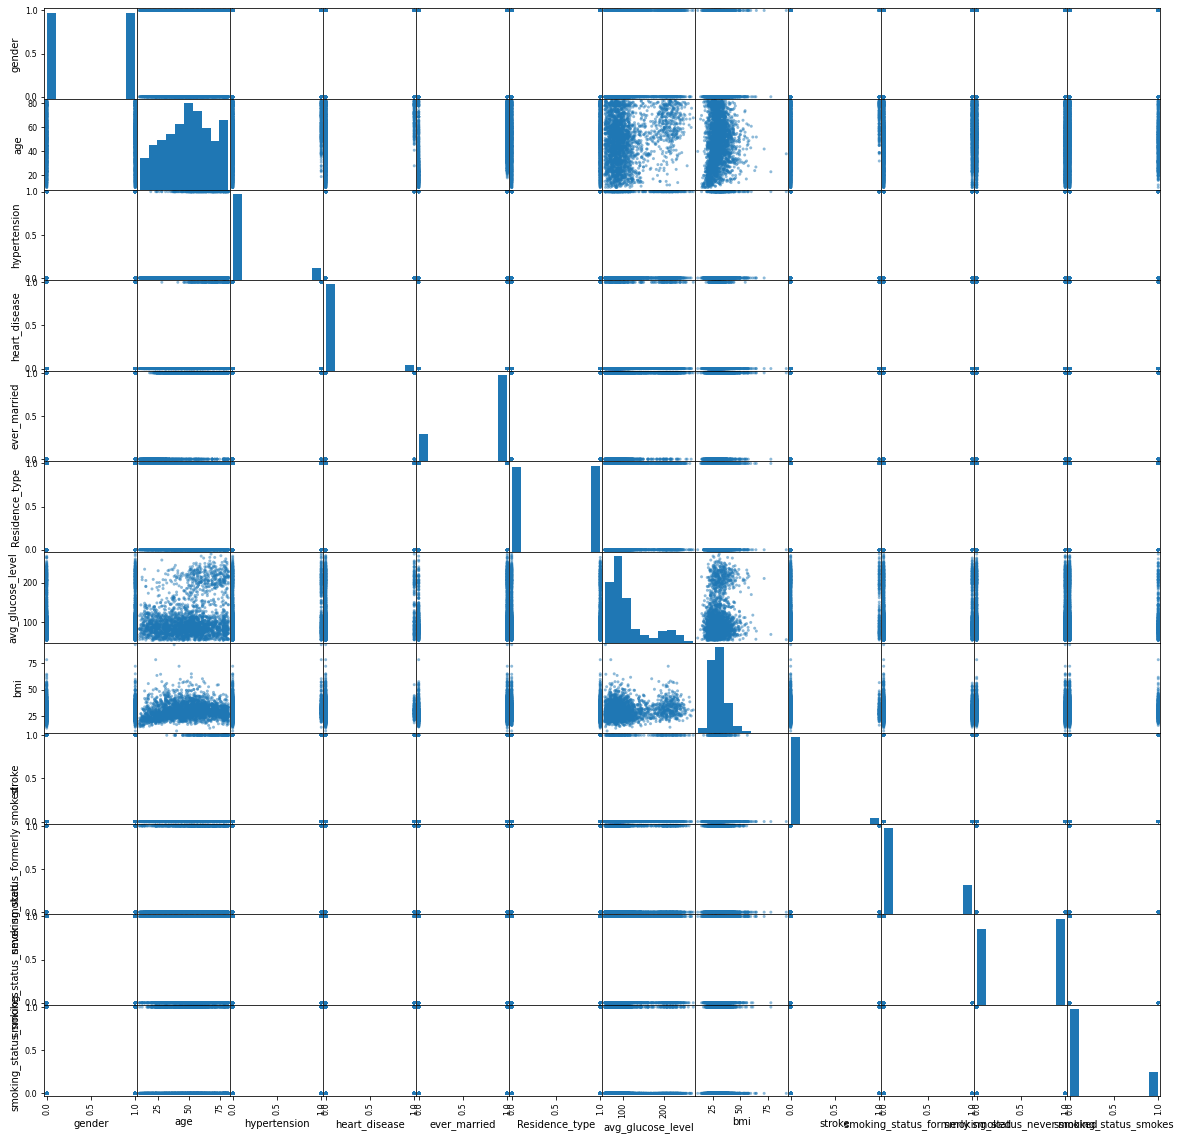

In [54]:
#Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

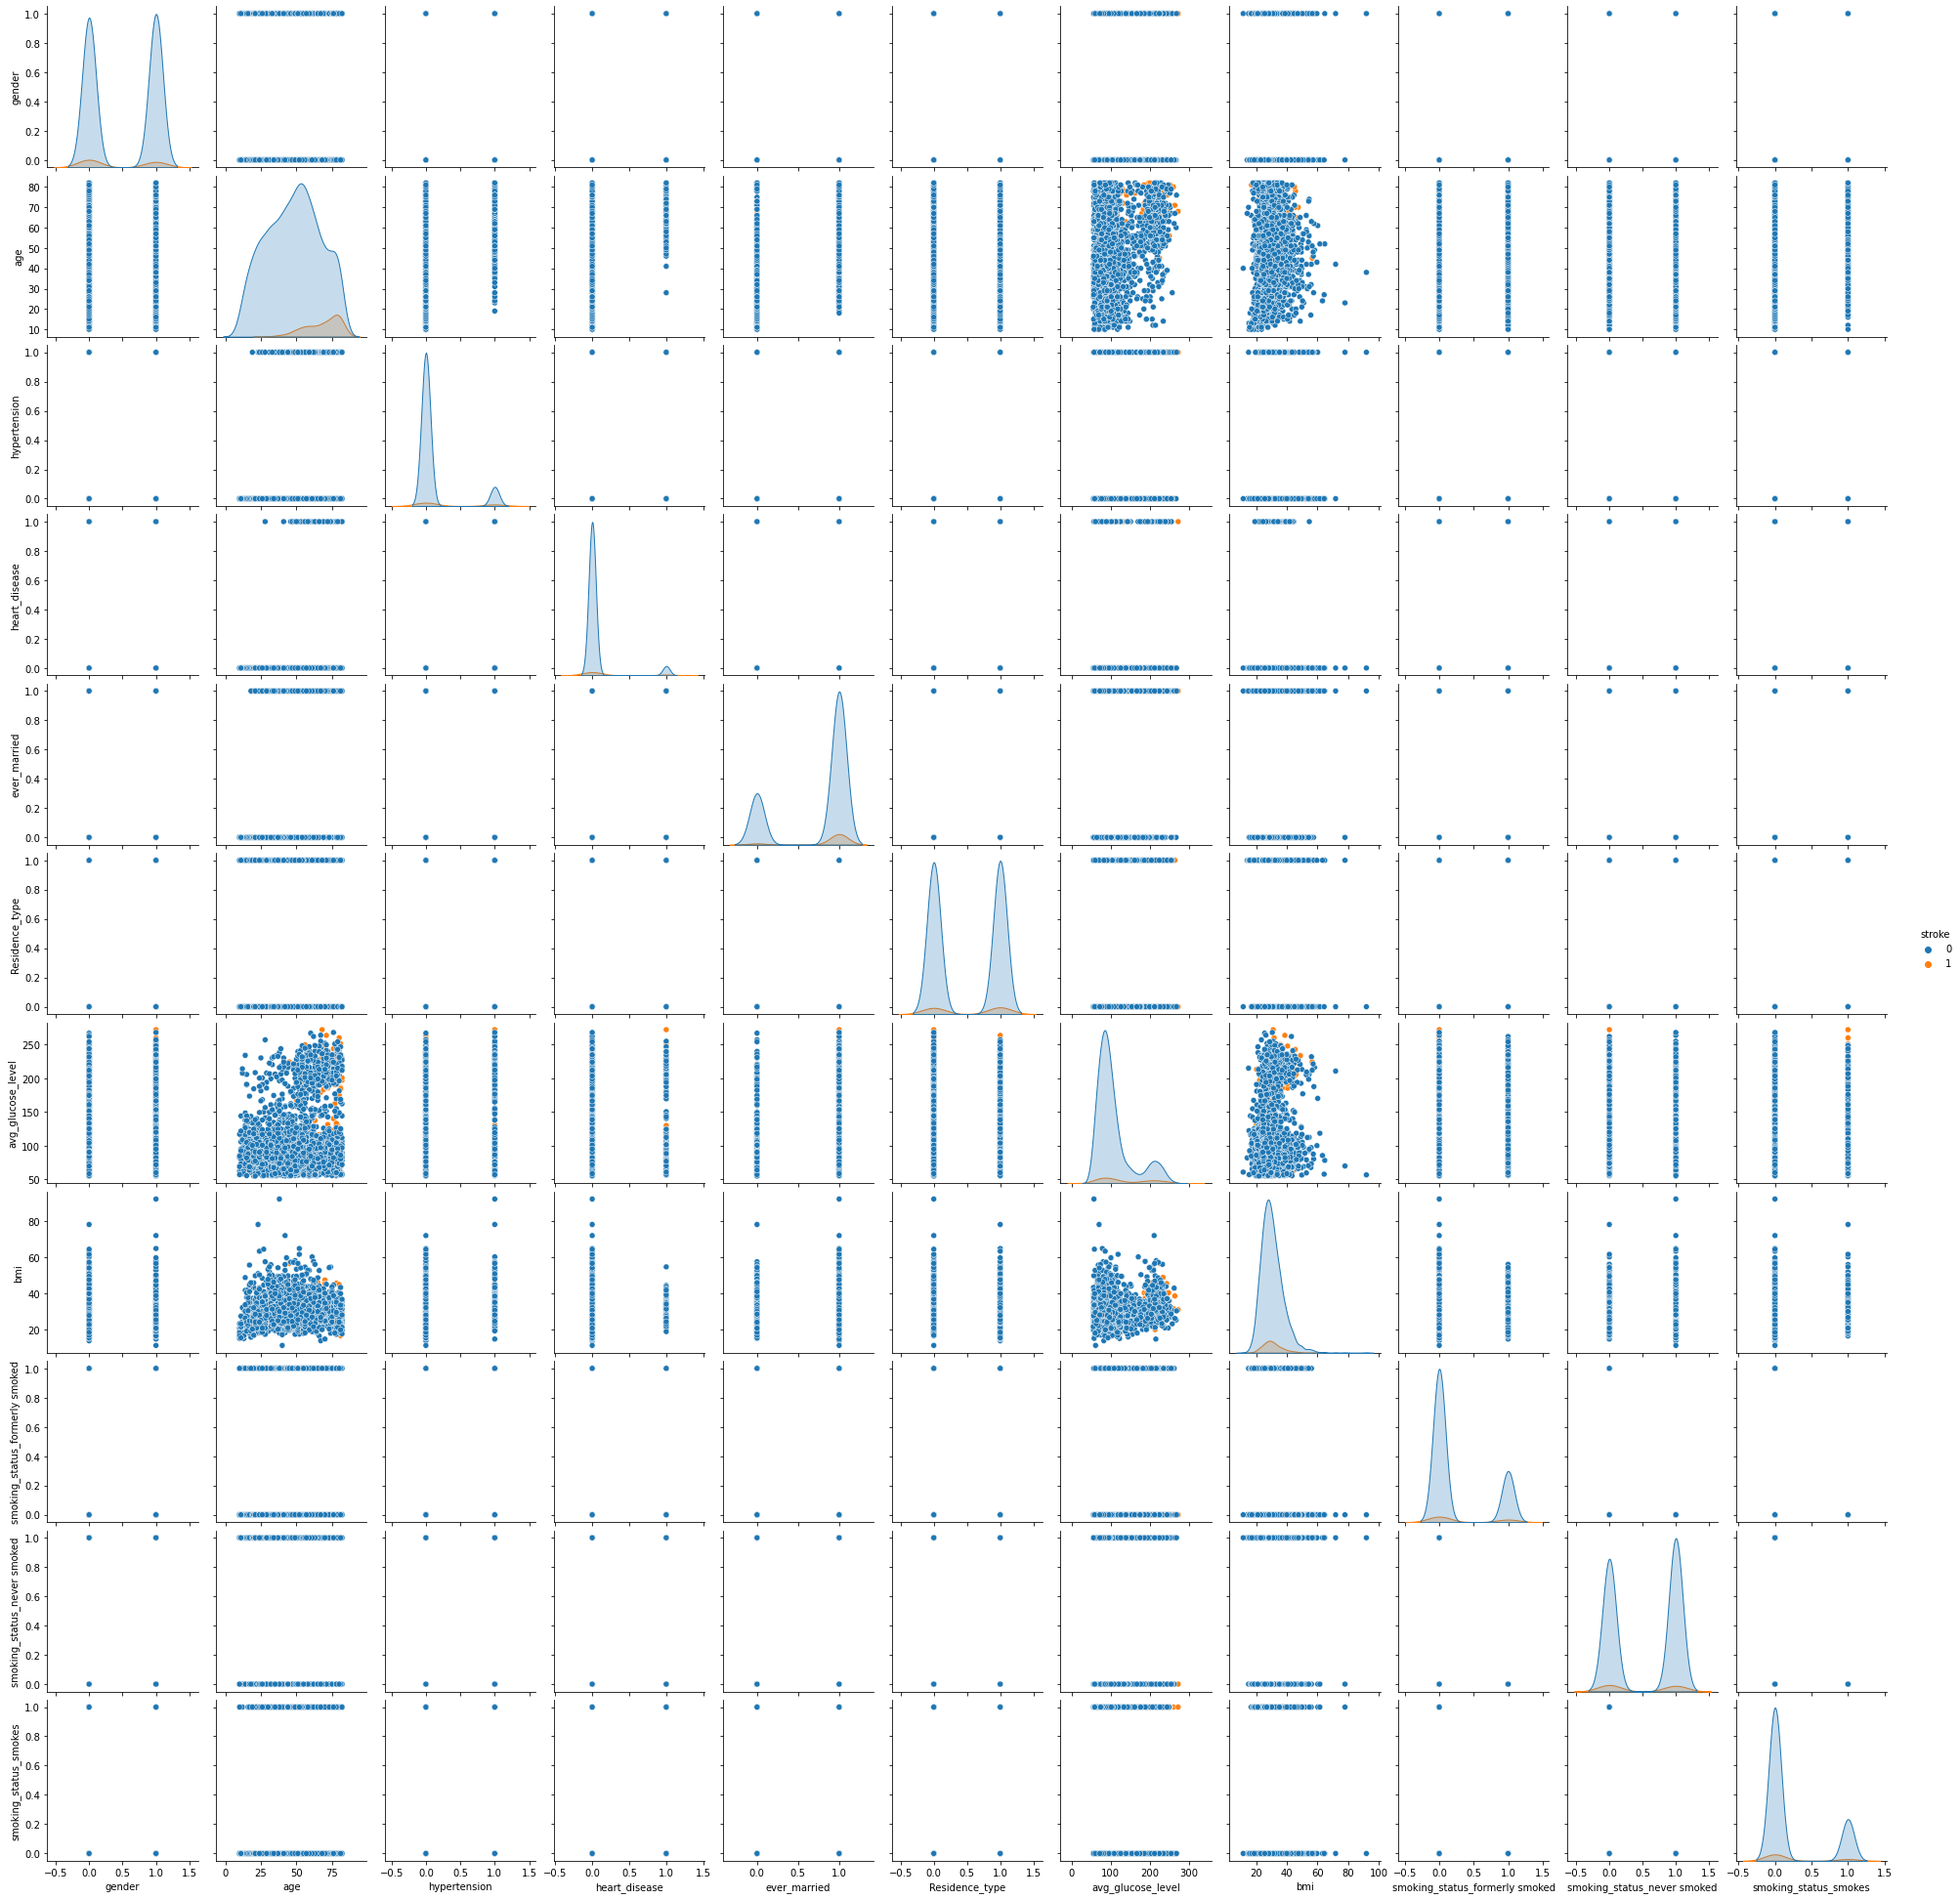

In [55]:
# Pairplot
sns.pairplot(data = dataset, hue = 'stroke')
plt.show()

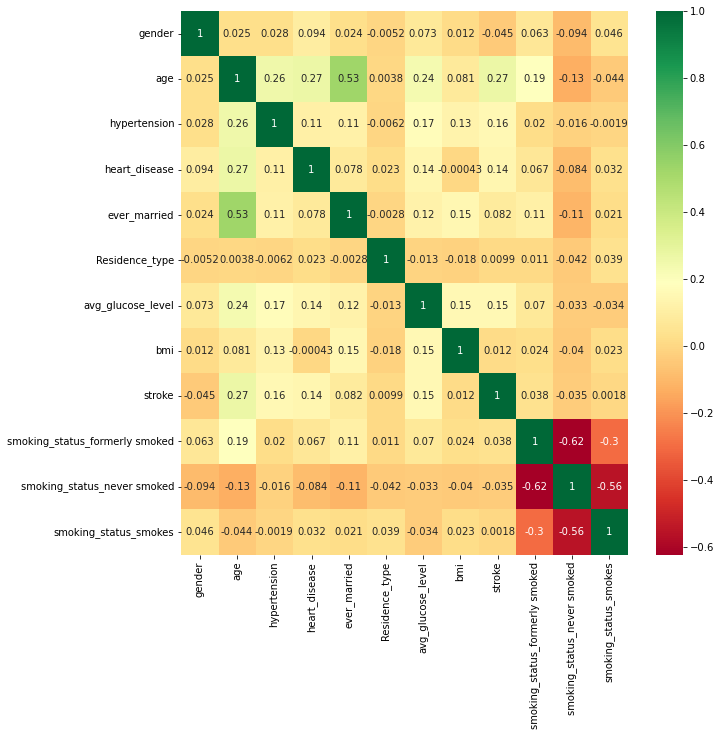

In [56]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [57]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0


In [58]:
dataset.columns = ['Jenis Kelamin', 'Umur', 'Hipertensi', 'Penyakit Jantung', 
                   'Status Pernikahan', 'Tempat Tinggal', 'Kadar Glukosa Rata-Rata', 
                  'Indeks Massa Tubuh', 'Stroke', 'Formerly Smoked', 'Never Smoked',
                  'Smokes']

In [59]:
dataset.head()

,Jenis Kelamin,Umur,Hipertensi,Penyakit Jantung,Status Pernikahan,Tempat Tinggal,Kadar Glukosa Rata-Rata,Indeks Massa Tubuh,Stroke,Formerly Smoked,Never Smoked,Smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0


In [60]:
stroke_col = dataset.pop('Stroke')
dataset.insert(11, 'Stroke', stroke_col)

In [61]:
dataset.head()

,Jenis Kelamin,Umur,Hipertensi,Penyakit Jantung,Status Pernikahan,Tempat Tinggal,Kadar Glukosa Rata-Rata,Indeks Massa Tubuh,Formerly Smoked,Never Smoked,Smokes,Stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1
2,1,80.0,0,1,1,0,105.92,32.5,0,1,0,1
3,0,49.0,0,0,1,1,171.23,34.4,0,0,1,1
4,0,79.0,1,0,1,0,174.12,24.0,0,1,0,1
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1


### d. Normalization. Lakukan normalisasi data ke skor standar atau z-score z = (x - u)/s dimana u dan s adalah nilai rata-rata dan std deviasi. Tampilkan data sebelum dan setelah normalisasi (cukup beberapa saja).

In [62]:
target_name = 'Stroke'
features = dataset.drop(target_name, axis=1)
target = dataset[target_name]

In [63]:
features

,Jenis Kelamin,Umur,Hipertensi,Penyakit Jantung,Status Pernikahan,Tempat Tinggal,Kadar Glukosa Rata-Rata,Indeks Massa Tubuh,Formerly Smoked,Never Smoked,Smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5092,1,76.0,0,0,1,1,82.35,38.9,0,1,0
5096,1,57.0,0,0,1,0,76.62,28.2,0,1,0
5100,1,82.0,1,0,1,0,71.97,28.3,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,1,0


In [64]:
target

0       1
2       1
3       1
4       1
5       1
       ..
5092    0
5096    0
5100    0
5106    0
5108    0
Name: Stroke, Length: 2678, dtype: int64

In [65]:
# hitung nilai rata-rata dan standar deviasi dari setiap fitur
u = np.mean(features, axis=0)
s = np.std(features, axis=0)

# normalisasi dataset ke skor standar atau z-score
normalized_features = (features - u) / s

# cetak hasil normalisasi
print(normalized_features)

      Jenis Kelamin      Umur  Hipertensi  Penyakit Jantung  \
0               1.0  0.937296   -0.378126          3.736428   
2               1.0  1.622793   -0.378126          3.736428   
3              -1.0 -0.011854   -0.378126         -0.267635   
4              -1.0  1.570063    2.644623         -0.267635   
5               1.0  1.675524   -0.378126         -0.267635   
...             ...       ...         ...               ...   
5092            1.0  1.411871   -0.378126         -0.267635   
5096            1.0  0.409991   -0.378126         -0.267635   
5100            1.0  1.728254    2.644623         -0.267635   
5106           -1.0  1.675524   -0.378126         -0.267635   
5108            1.0  0.093608   -0.378126         -0.267635   

      Status Pernikahan  Tempat Tinggal  Kadar Glukosa Rata-Rata  \
0              0.564988        0.992559                 2.475143   
2              0.564988       -1.007496                -0.063026   
3              0.564988        0.992559

### Menggunakan StandardScaler

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform(features)

In [67]:
print(standardized_data)

[[ 1.          0.9372962  -0.37812576 ...  1.71075604 -1.06483076
  -0.52173655]
 [ 1.          1.62279323 -0.37812576 ... -0.58453688  0.93911637
  -0.52173655]
 [-1.         -0.01185354 -0.37812576 ... -0.58453688 -1.06483076
   1.91667615]
 ...
 [ 1.          1.72825432  2.64462282 ... -0.58453688  0.93911637
  -0.52173655]
 [-1.          1.67552377 -0.37812576 ... -0.58453688  0.93911637
  -0.52173655]
 [ 1.          0.09360754 -0.37812576 ...  1.71075604 -1.06483076
  -0.52173655]]
